In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np

In [2]:
calendar = pd.read_csv('data/mmt_gtfs/calendar.txt') #assumes unzipped GTFS
routes = pd.read_csv('data/mmt_gtfs/routes.txt')
stop_times = pd.read_csv('data/mmt_gtfs/stop_times.txt')
trips = pd.read_csv('data/mmt_gtfs/trips.txt')


In [3]:
#classifying calendar
days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
service_days = []
for idx, row in calendar.iterrows():
    service = []
    for day in days:
        if row[day] == 1:
            service.append(day)
    service_days.append(service)
    
calendar['service'] = service_days
calendar

,service_id,service_name,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,service
0,88_D24,December 24,0,0,0,0,0,0,0,20191201,20200229,[]
1,88_D31,December 31,0,0,0,0,0,0,0,20191201,20200229,[]
2,88_HOL,Holiday,0,0,0,0,0,0,0,20191201,20200229,[]
3,88_MWK,Modified,0,0,0,0,0,0,0,20191201,20200229,[]
4,88_MWK:R,Recess Modified,0,0,0,0,0,0,0,20191201,20200229,[]
5,88_SAT,Saturday,0,0,0,0,0,1,0,20191201,20200229,[saturday]
6,88_SAT:L,Latenight Saturday,0,0,0,0,0,1,0,20191201,20200229,[saturday]
7,88_SAT:R,Recess Saturday,0,0,0,0,0,0,0,20191201,20200229,[]
8,88_SAT:S,Standard Saturday,0,0,0,0,0,1,0,20191201,20200229,[saturday]
9,88_SUN,Sunday,0,0,0,0,0,0,1,20191201,20200229,[sunday]


In [4]:
df1 = pd.merge(calendar[['service', 'service_id']], trips, on='service_id')
df1.tail()

,service,service_id,route_id,route_short_name,trip_id,trip_headsign,direction_id,direction_name,block_id,shape_id,shape_code,trip_type,trip_sort,wheelchair_accessible,bikes_allowed
14738,[friday],89_WKD:S=6,8762,80,935465,MEMORIAL UNION: VIA SOUTH CAMPUS,1,U.W. Campus,188604,53583,80e,NaN,82620,1,1
14739,[friday],89_WKD:S=6,8762,80,935464,MEMORIAL UNION: VIA SOUTH CAMPUS,1,U.W. Campus,188604,53583,80e,NaN,85620,1,1
14740,[friday],89_WKD:S=6,8762,80,935463,MEMORIAL UNION: VIA SOUTH CAMPUS,1,U.W. Campus,188604,53583,80e,NaN,88620,1,1
14741,[friday],89_WKD:S=6,8762,80,935445,MEMORIAL UNION: VIA SOUTH CAMPUS,1,U.W. Campus,188604,53583,80e,F,91320,1,1
14742,[friday],89_WKD:S=6,8762,80,935444,MEMORIAL UNION: VIA SOUTH CAMPUS,1,U.W. Campus,188604,53583,80e,F,94020,1,1


In [5]:
df2 = pd.merge(df1[['route_short_name', 'trip_id', 'service']], stop_times, on='trip_id') #merging the two dataframes


#fixing hour values that are >= 24, since 25:23:00 should be interpreted as 1:23:00 in this context
df2.loc[(df2.arrival_time.str.startswith('24')),'arrival_time']= df2.arrival_time.str.replace('24', '00')
df2.loc[(df2.arrival_time.str.startswith('25')),'arrival_time']= df2.arrival_time.str.replace('25', '01')
df2.loc[(df2.arrival_time.str.startswith('26')),'arrival_time']= df2.arrival_time.str.replace('26', '02')
df2.loc[(df2.arrival_time.str.startswith('27')),'arrival_time']= df2.arrival_time.str.replace('27', '03')
df2.loc[(df2.arrival_time.str.startswith('28')),'arrival_time']= df2.arrival_time.str.replace('28', '04')
df2.loc[(df2.arrival_time.str.startswith('29')),'arrival_time']= df2.arrival_time.str.replace('29', '05')
df2['arrival_time'] = pd.to_timedelta(df2['arrival_time']) #converting the arrive_time from str to timedelta

#only want 1 trip_id so take the first stop sequence for each trip
df2 = df2[df2.stop_sequence == 1].reset_index()
df2

,index,route_short_name,trip_id,service,stop_sequence,stop_id,pickup_type,drop_off_type,arrival_time,departure_time,timepoint,stop_headsign,shape_dist_traveled
0,0,1,911671,[],1,2561,0,1,09:56:00,9:56:00,1,CAPITOL SQUARE,0.0210
1,18,1,911672,[],1,2561,0,1,10:56:00,10:56:00,1,CAPITOL SQUARE,0.0210
2,36,1,911673,[],1,2561,0,1,11:56:00,11:56:00,1,CAPITOL SQUARE,0.0210
3,54,1,911674,[],1,2561,0,1,12:56:00,12:56:00,1,CAPITOL SQUARE,0.0210
4,72,1,911675,[],1,2561,0,1,13:56:00,13:56:00,1,CAPITOL SQUARE,0.0210
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,533205,80,935465,[friday],1,2082,0,1,22:57:00,22:57:00,1,MEMORIAL UNION: VIA SOUTH CAMPUS,0.0169
14739,533234,80,935464,[friday],1,2082,0,1,23:47:00,23:47:00,1,MEMORIAL UNION: VIA SOUTH CAMPUS,0.0169
14740,533263,80,935463,[friday],1,2082,0,1,00:37:00,24:37:00,1,MEMORIAL UNION: VIA SOUTH CAMPUS,0.0169
14741,533292,80,935445,[friday],1,2082,0,1,01:22:00,25:22:00,1,MEMORIAL UNION: VIA SOUTH CAMPUS,0.0169


In [21]:
def convert_time(hour):
    time = str(hour)
    return time + ':00:00'


def filter_by_time(time1, time2, day): #for now please ensure that time2 > time2, E.G don't input 23 to 4 even though its important
    time1 = pd.to_timedelta(convert_time(time1))
    time2 = pd.to_timedelta(convert_time(time2))
    temp_df = df2[(df2['arrival_time'] > time1) & (df2['arrival_time'] < time2)]
    
    columns = list(temp_df.columns)
    new_df = pd.DataFrame(columns=columns)
    for idx, row in temp_df.iterrows():
        if day in row['service']:
            new_df = new_df.append(temp_df.loc[idx])
    
    
    new_df = new_df.reset_index().groupby('route_short_name').count()
    new_df['trips'] = new_df['trip_id']
    span = time2 - time1 
    span_hour = span.total_seconds() / 3600 #total hours in span
    span_minutes = span.total_seconds() / 60
    new_df['frequency (trips per hour)'] = new_df['trips'] / span_hour
    new_df['Average Headway'] = span_minutes / new_df['trips']
    
    
    
    
    
    return new_df[['trips', 'frequency (trips per hour)', 'Average Headway']]

    
filter_by_time(0,23,'friday').sort_values(by='frequency (trips per hour)', ascending=False)

,trips,frequency (trips per hour),Average Headway
route_short_name,,,
80,484,21.043478,2.851240
10,268,11.652174,5.149254
6,198,8.608696,6.969697
2,192,8.347826,7.187500
3,140,6.086957,9.857143
30,140,6.086957,9.857143
18,136,5.913043,10.147059
20,130,5.652174,10.615385
15,128,5.565217,10.781250


In [7]:
def daily_frequency(day):
    to_be_appended = []
    for i in range(24):
        data = filter_by_time(i, i+1, day).mean().to_list()
        to_be_appended.append([str(i)+':00', str(i)+':00'+ " - " + str(i) + ':59'] + data)
    return pd.DataFrame(to_be_appended, columns=['Time', 'Interval', 'Trips', 'Frequency', 'Average Headway']).fillna(0)
monday = daily_frequency('monday')


In [8]:
monday

,Time,Interval,Trips,Frequency,Average Headway
0,0:00,0:00 - 0:59,6.666667,6.666667,10.000000
1,1:00,1:00 - 1:59,6.000000,6.000000,15.000000
2,2:00,2:00 - 2:59,0.000000,0.000000,0.000000
3,3:00,3:00 - 3:59,0.000000,0.000000,0.000000
4,4:00,4:00 - 4:59,2.000000,2.000000,30.000000
5,5:00,5:00 - 5:59,3.629630,3.629630,21.732804
6,6:00,6:00 - 6:59,5.531915,5.531915,14.388298
7,7:00,7:00 - 7:59,6.600000,6.600000,13.005952
8,8:00,8:00 - 8:59,7.000000,7.000000,15.282891
9,9:00,9:00 - 9:59,5.513514,5.513514,18.801641


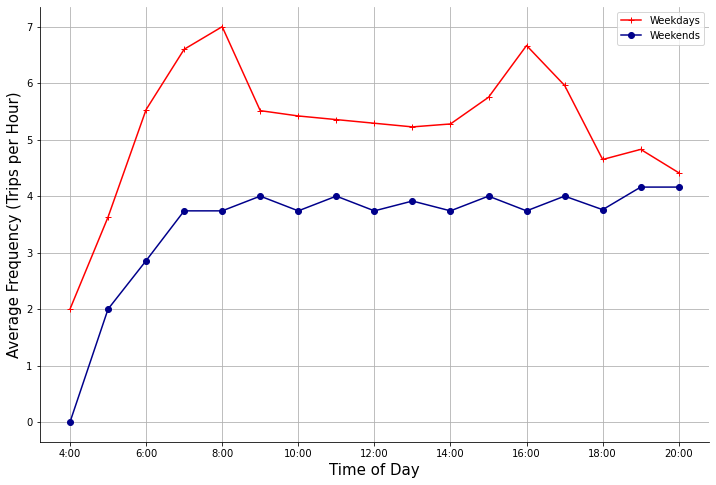

In [107]:

fig, ax = plt.subplots(figsize=(12,8))

weekday = daily_frequency('thursday')
weekday.iloc[4:21].plot.line(x='Time', y='Frequency', ax=ax, label= 'Weekdays', color='red', marker='+')
weekend= daily_frequency('saturday')
weekend.iloc[4:21].plot.line(x='Time', y='Frequency', ax=ax, label='Weekends', color='darkblue', marker = 'o')
ax.set_ylabel('Average Frequency (Trips per Hour)', fontsize=15)
ax.set_xlabel('Time of Day', fontsize=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid()


In [38]:
filtered = filter_by_time(6, 21,'friday').sort_values(by='frequency (trips per hour)', ascending=False)
filtered2 = filter_by_time(6, 21,'sunday').sort_values(by='frequency (trips per hour)', ascending=False)


In [106]:
filtered.iloc[0:5]

,trips,frequency (trips per hour),Average Headway
route_short_name,,,
80,456,30.400000,1.973684
10,266,17.733333,3.383459
2,168,11.200000,5.357143
6,166,11.066667,5.421687
3,120,8.000000,7.500000


In [89]:
comparison = pd.merge(filtered[["frequency (trips per hour)"]], filtered2[['frequency (trips per hour)']], on='route_short_name')
comparison = comparison.rename(columns={'frequency (trips per hour)_x': 'Weekday', 'frequency (trips per hour)_y': 'Weekend'})
comparison

,Weekday,Weekend
route_short_name,,
80,30.400000,4.133333
2,11.200000,7.466667
6,11.066667,3.733333
30,8.000000,7.200000
18,7.733333,7.200000
20,7.600000,6.933333
17,7.466667,7.066667
5,7.200000,3.733333
4,7.066667,3.733333


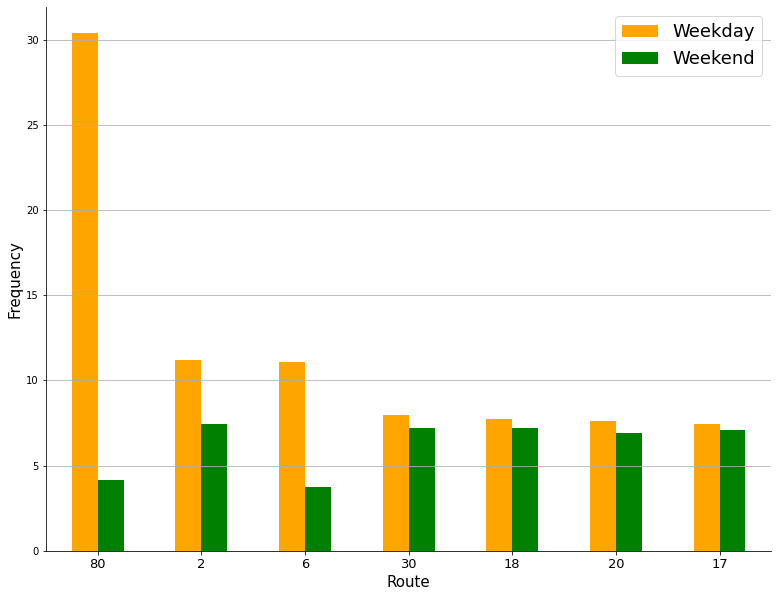

In [100]:
fig, ax = plt.subplots(figsize=(13,10))
comparison.head(7).plot.bar(ax=ax, color=['orange', 'green'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Route', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
plt.xticks(rotation=0, fontsize=13)
ax.legend(prop={'size': 18})
ax.grid(axis='y')